# Random Forest Model

In [87]:
#used packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [88]:
#Here we are importing the cleaned dataset
%store -r df
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,left
13820,0.88,0.58,3.0,145.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1359,0.46,0.46,2.0,145.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7501,0.62,0.51,4.0,208.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10847,0.93,0.91,2.0,238.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12915,0.54,0.41,3.0,175.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,0.69,0.51,3.0,257.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9370,0.77,0.83,5.0,197.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5997,0.63,0.75,4.0,155.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11291,0.62,0.91,3.0,251.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#Label predictive variable and remove from orig dataset & convert to np array
labels = np.array(df['left'])
features= df.drop('left', axis = 1)
features = np.array(df)

# Saving feature names for later use
feature_list = list(df.columns)

In [94]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3)

In [90]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (10049, 19)
Training Labels Shape: (10049,)
Testing Features Shape: (4950, 19)
Testing Labels Shape: (4950,)


In [91]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(train_features,train_labels)
# predictions
rfc_predict = rfc.predict(test_features)

In [92]:
rfc_cv_score = cross_val_score(rfc, features, labels, cv=10, scoring='roc_auc')

In [93]:
print("=== Confusion Matrix ===")
print(confusion_matrix(test_labels, rfc_predict))
#print(confusion_matrix(test_labels, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_labels, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


=== Confusion Matrix ===
[[3801    0]
 [   0 1149]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3801
         1.0       1.00      1.00      1.00      1149

    accuracy                           1.00      4950
   macro avg       1.00      1.00      1.00      4950
weighted avg       1.00      1.00      1.00      4950



=== All AUC Scores ===
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  1.0


### I want to note here that there were no inaccuracies made, the random forest model was able to 100% correctly predict if the employee left. Given the success rate, I do not see a need to tune hyperparameters.

# Analyzing the Findings

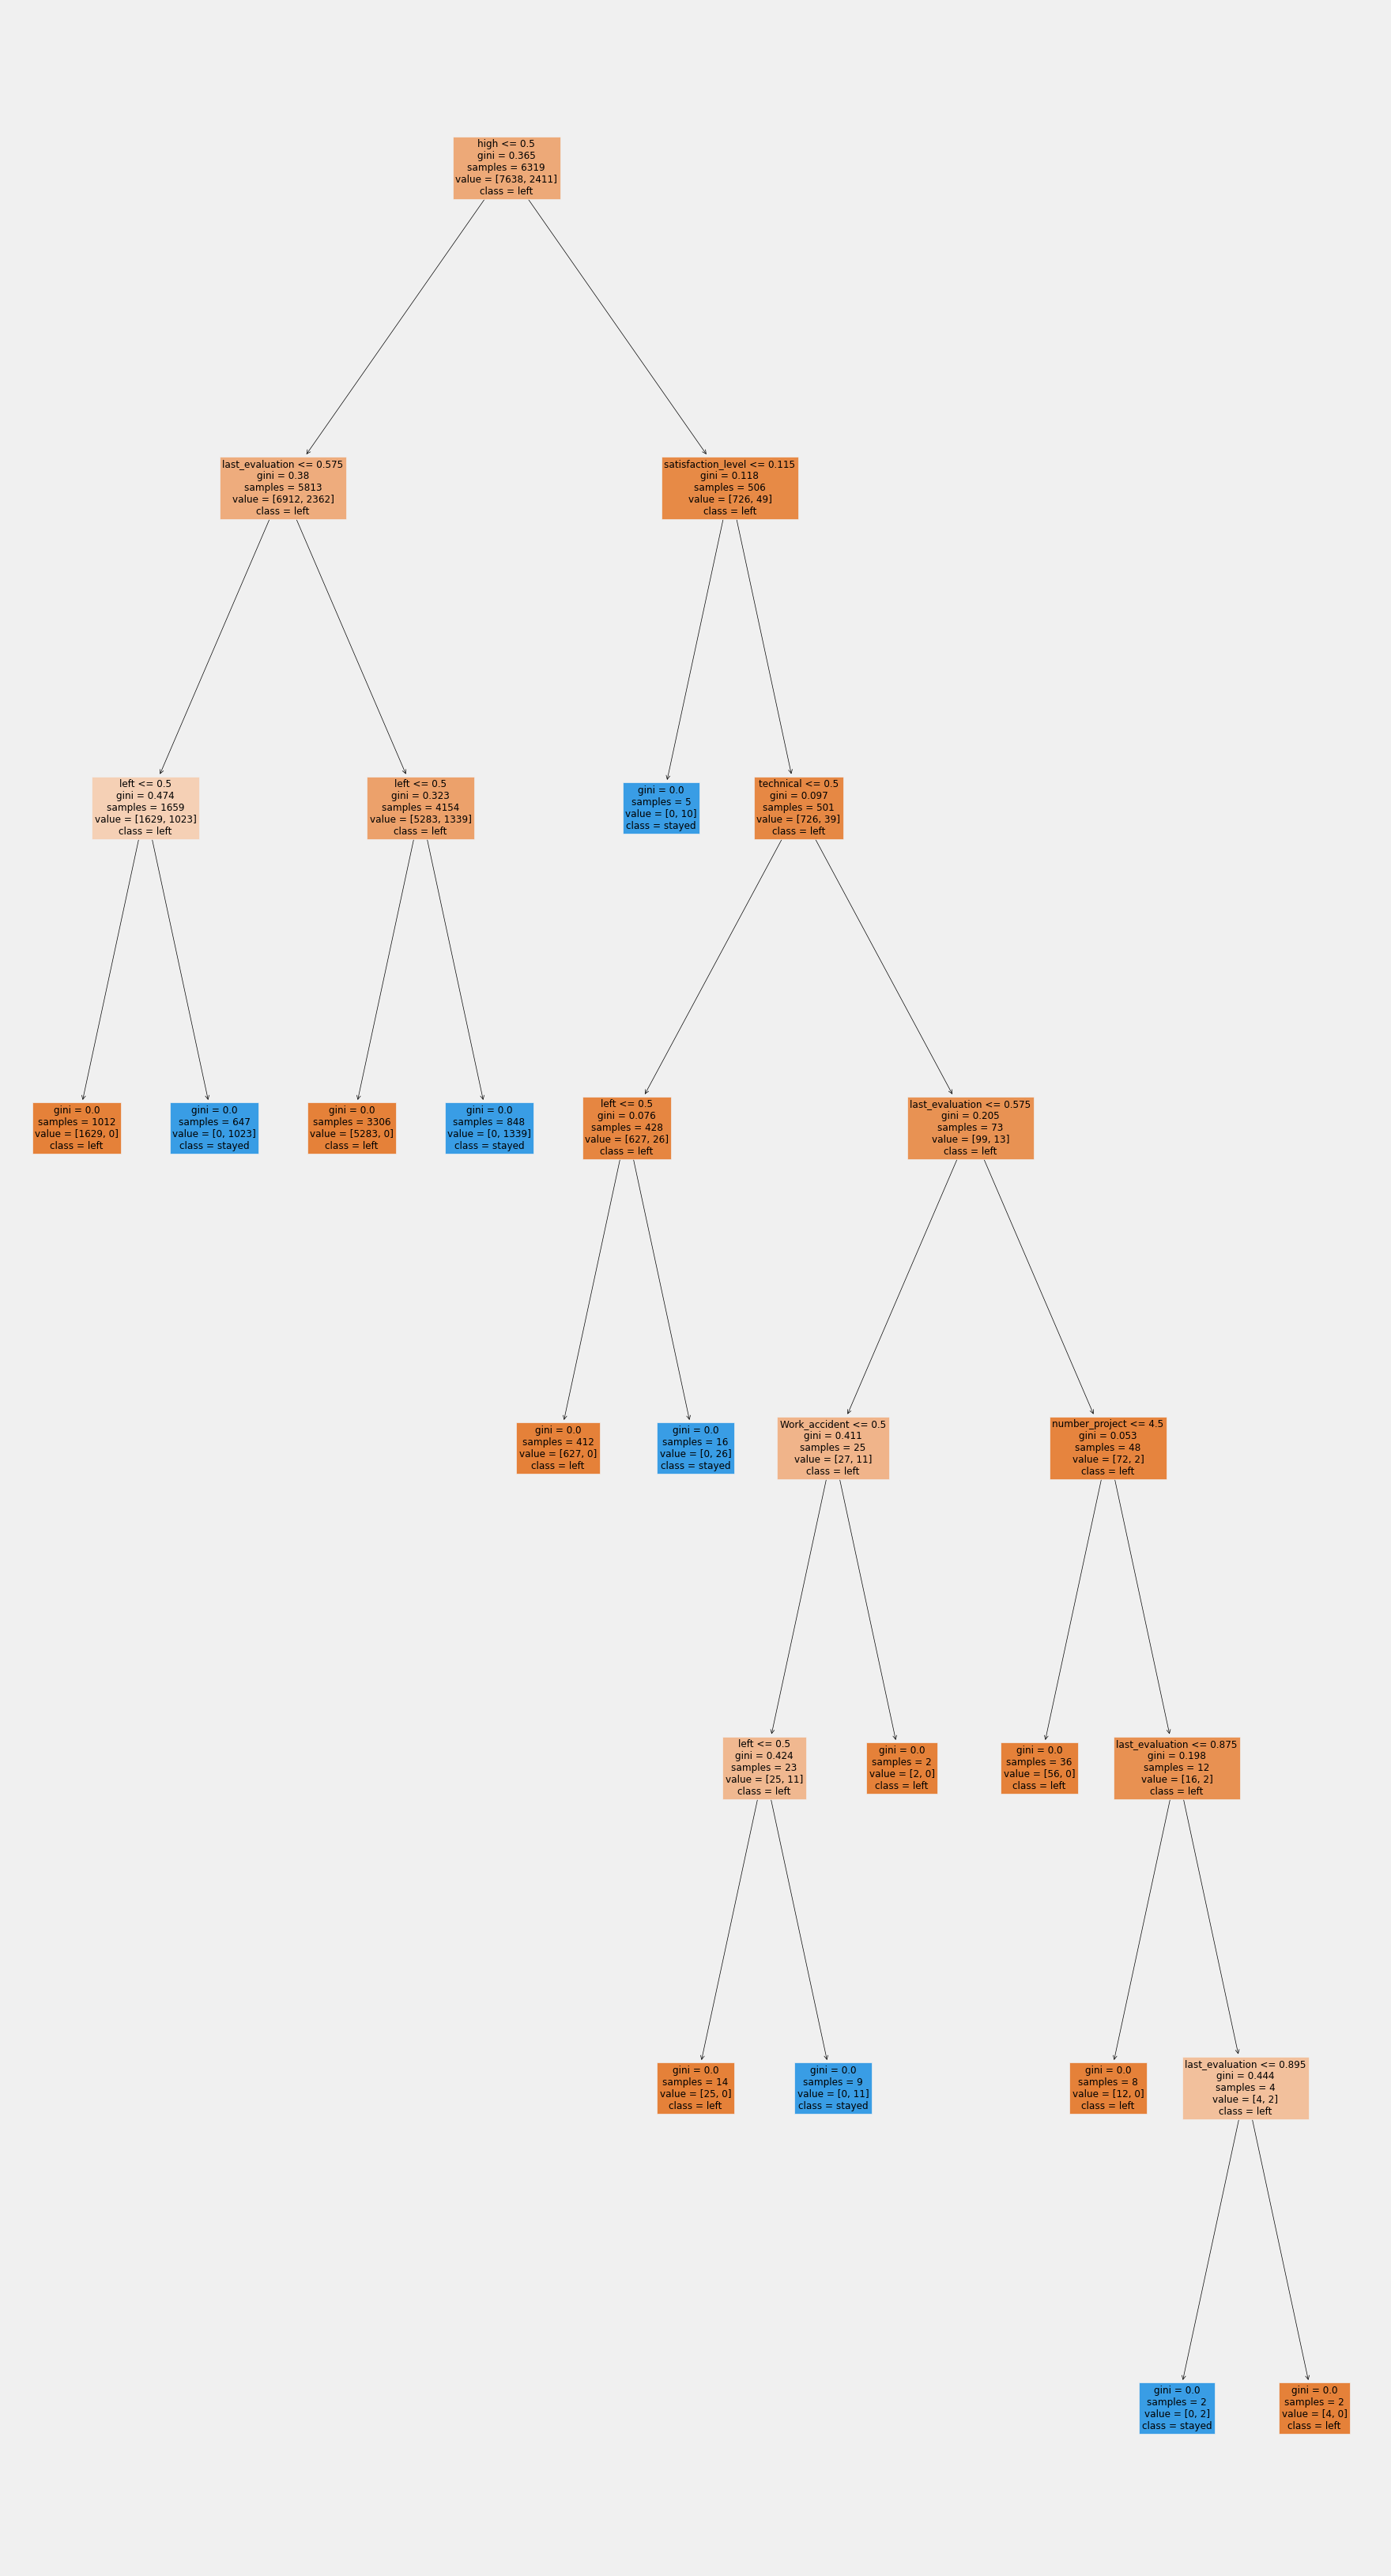

In [85]:
plt.figure(figsize=(20,40))
plot_tree(rfc.estimators_[5], feature_names = df.columns,class_names=['left', "stayed"],filled=True);

In [79]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:19} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: left                Importance: 0.63
Variable: satisfaction_level  Importance: 0.15
Variable: number_project      Importance: 0.08
Variable: average_montly_hours Importance: 0.05
Variable: time_spend_company  Importance: 0.05
Variable: last_evaluation     Importance: 0.03
Variable: Work_accident       Importance: 0.0
Variable: promotion_last_5years Importance: 0.0
Variable: IT                  Importance: 0.0
Variable: accounting          Importance: 0.0
Variable: hr                  Importance: 0.0
Variable: management          Importance: 0.0
Variable: marketing           Importance: 0.0
Variable: product_mng         Importance: 0.0
Variable: sales               Importance: 0.0
Variable: support             Importance: 0.0
Variable: technical           Importance: 0.0
Variable: high                Importance: 0.0
Variable: low                 Importance: 0.0


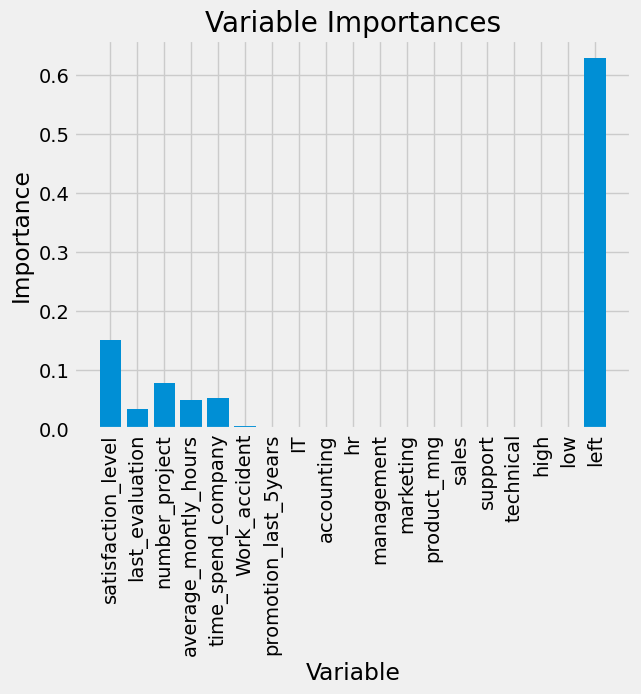

In [80]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');